In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../DATA/airline_tweets.csv")

In [4]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


<Axes: xlabel='airline', ylabel='count'>

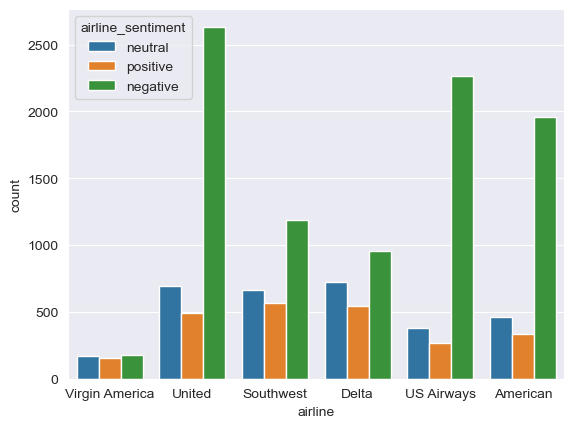

In [5]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

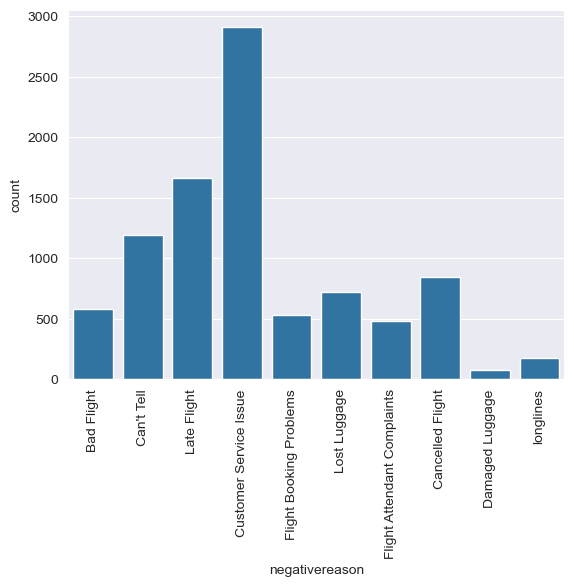

In [10]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline_sentiment', ylabel='count'>

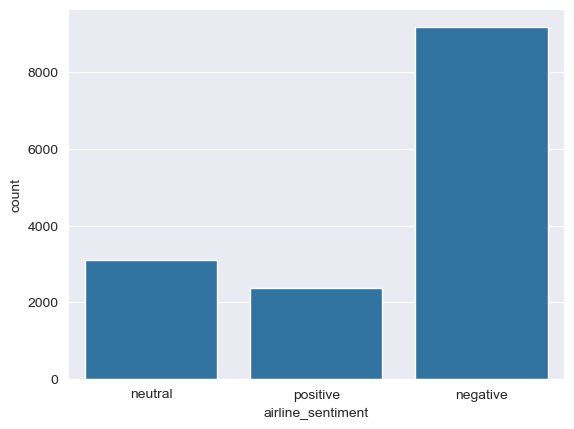

In [12]:
sns.countplot(data=df, x='airline_sentiment')

In [13]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [14]:
data = df[['airline_sentiment', 'text']]

In [15]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [16]:
X = df['text']

In [17]:
y = df['airline_sentiment']

In [18]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(stop_words='english')

In [23]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [24]:
X_train_tfidf = tfidf.transform(X_train)

In [25]:
X_test_tfidf = tfidf.transform(X_test)

In [26]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
nb = MultinomialNB()

In [31]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [34]:
from sklearn.svm import LinearSVC

In [35]:
svc = LinearSVC()

In [36]:
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [39]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(preds, y_test))
    ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot(cmap='Blues')

NB model
              precision    recall  f1-score   support

    negative       0.99      0.66      0.79      2730
     neutral       0.15      0.79      0.26       123
    positive       0.14      0.89      0.24        75

    accuracy                           0.67      2928
   macro avg       0.43      0.78      0.43      2928
weighted avg       0.94      0.67      0.76      2928



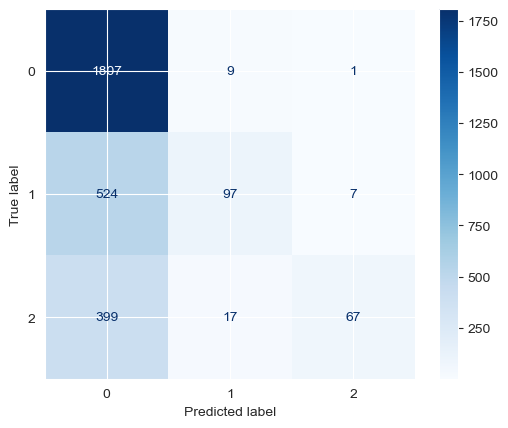

In [40]:
print('NB model')
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.93      0.80      0.86      2120
     neutral       0.47      0.63      0.54       465
    positive       0.58      0.81      0.68       343

    accuracy                           0.77      2928
   macro avg       0.66      0.75      0.69      2928
weighted avg       0.82      0.77      0.79      2928



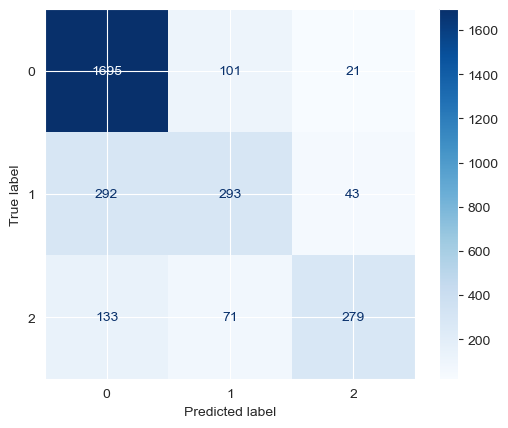

In [41]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.89      0.82      0.86      1970
     neutral       0.52      0.59      0.55       554
    positive       0.64      0.76      0.69       404

    accuracy                           0.77      2928
   macro avg       0.68      0.73      0.70      2928
weighted avg       0.79      0.77      0.78      2928



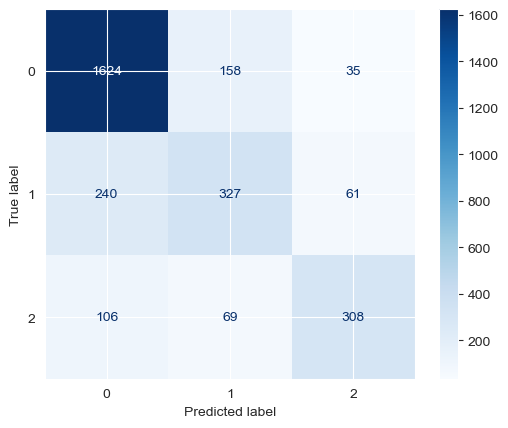

In [42]:
print('SVC')
report(svc)

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [45]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [46]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [47]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [48]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)